# DATA PREPROCESSING

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
importances = None
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import shap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

data=pd.read_csv('ECommerceDataset.csv')


In [2]:
#Checking for missing values 

In [3]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [4]:
#checking shape and size of dataset 

In [5]:
shape=data.shape
size=data.size
print(shape)
print(size)


(5630, 20)
112600


In [6]:
#Calculating the missing percentage of data for this data set

In [7]:
missingvalpercentage=(data.isnull().sum()/len(data))*100
print(missingvalpercentage)

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64


In [8]:
#As there is need to maintain integrity of data we will do data imputation for missing valuse instead of data removal 

In [9]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())
data['WarehouseToHome'] = data['WarehouseToHome'].fillna(data['WarehouseToHome'].median())
data['HourSpendOnApp'] = data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].median())
data['OrderAmountHikeFromlastYear'] = data['OrderAmountHikeFromlastYear'].fillna(data['OrderAmountHikeFromlastYear'].median())
data['CouponUsed'] = data['CouponUsed'].fillna(data['CouponUsed'].median())
data['OrderCount'] = data['OrderCount'].fillna(data['OrderCount'].median())
data['DaySinceLastOrder'] = data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].median())


In [10]:
#Checkinng whether the imputation is done or not

In [11]:
print(data.isnull().sum())


CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [12]:
#lets have a descriptive info of data 
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.221492
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [13]:
#lets have basic information about data 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [15]:
#having a look at datahead

In [16]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [17]:
print(data.columns)


Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


### feature encoding

In [18]:
#we will do one hot encoding for nominal features of dataset

In [19]:
dataencoded=pd.get_dummies(data,columns=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'])
dataencoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,False,False,False,True,False,False,False,False,False,True
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,True,False,False,False,True,False,False,False,False,True
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,True,False,False,False,True,False,False,False,False,True
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,True,False,False,True,False,False,False,False,False,True
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,True,False,False,False,True,False,False,False,False,True


###### Feature scaling

In [20]:
numerical_columns=data.select_dtypes(include=['float64','int64']).columns
scaler=StandardScaler()
data[numerical_columns]=scaler.fit_transform(data[numerical_columns])
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))

+---+---------------------+--------------------+---------------------+----------------------+---------------------+----------------------+----------------------+--------+---------------------+--------------------------+--------------------+-----------------------+---------------+---------------------+--------------------+-----------------------------+---------------------+---------------------+---------------------+---------------------+
|   |     CustomerID      |       Churn        |       Tenure        | PreferredLoginDevice |      CityTier       |   WarehouseToHome    | PreferredPaymentMode | Gender |   HourSpendOnApp    | NumberOfDeviceRegistered |  PreferedOrderCat  |   SatisfactionScore   | MaritalStatus |   NumberOfAddress   |      Complain      | OrderAmountHikeFromlastYear |     CouponUsed      |     OrderCount      |  DaySinceLastOrder  |   CashbackAmount    |
+---+---------------------+--------------------+---------------------+----------------------+---------------------+-

# Exploratory Data Analysis

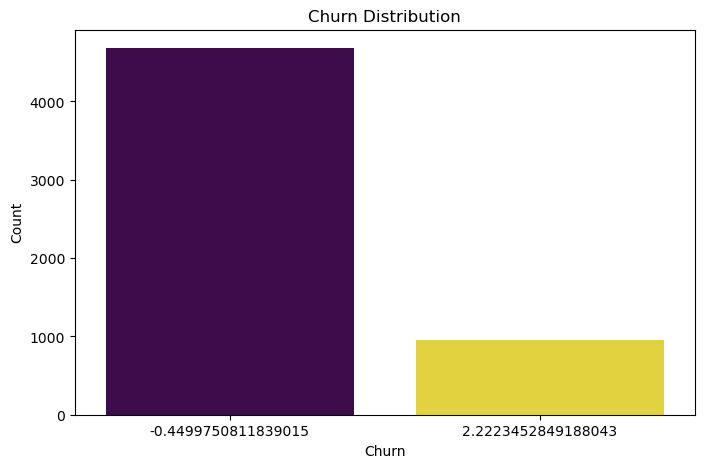

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Churn', hue='Churn', palette='viridis', dodge=False, legend=False)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

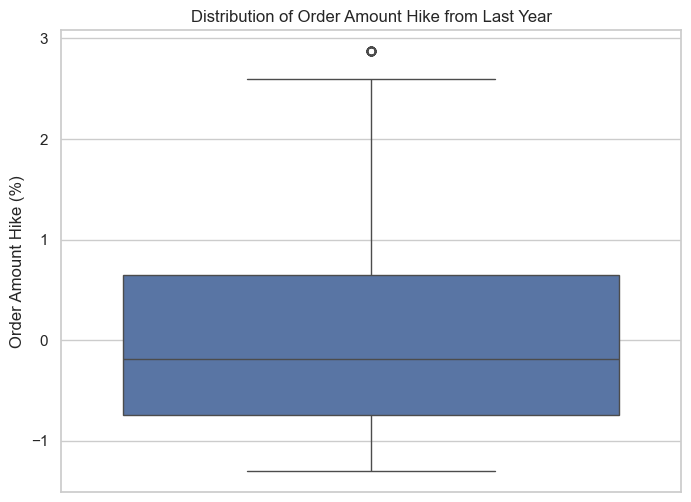

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.boxplot(data=data, y='OrderAmountHikeFromlastYear')
plt.title('Distribution of Order Amount Hike from Last Year')
plt.ylabel('Order Amount Hike (%)')
plt.show()


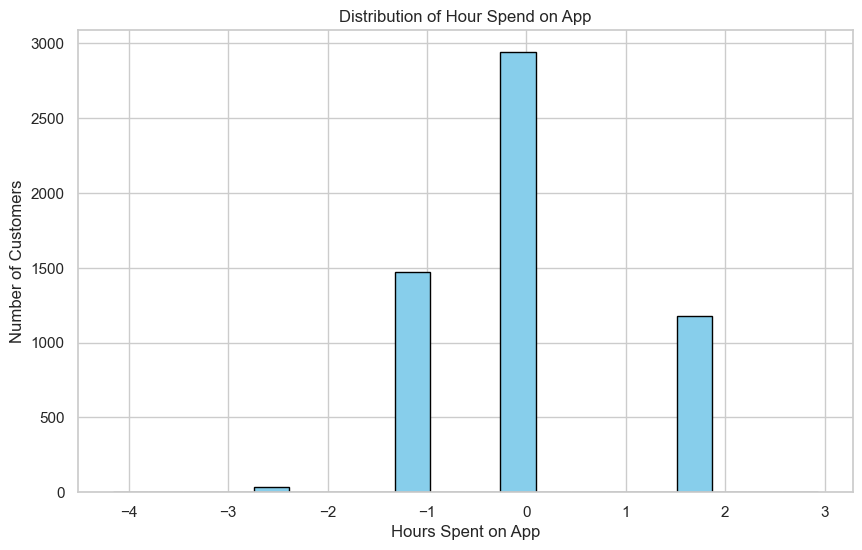

In [23]:


# Set the figure size
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(data['HourSpendOnApp'], bins=20, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Hour Spend on App')
plt.xlabel('Hours Spent on App')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()


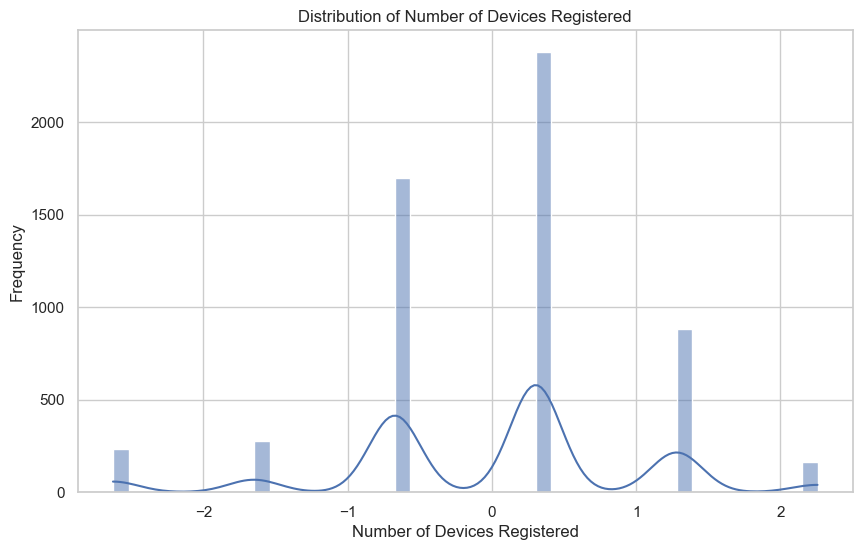

In [24]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='NumberOfDeviceRegistered', kde=True)

# Add titles and labels
plt.title('Distribution of Number of Devices Registered')
plt.xlabel('Number of Devices Registered')
plt.ylabel('Frequency')

# Show the plot
plt.show()

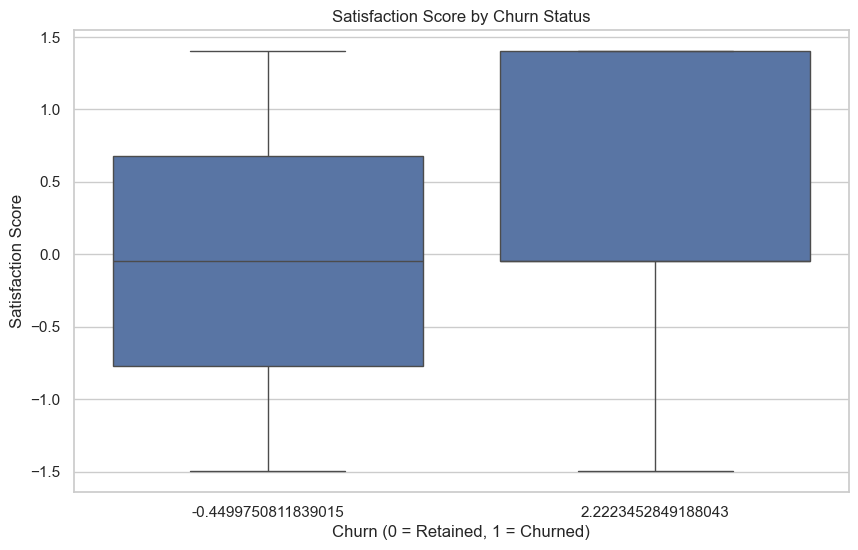

In [25]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='SatisfactionScore')

# Add titles and labels
plt.title('Satisfaction Score by Churn Status')
plt.xlabel('Churn (0 = Retained, 1 = Churned)')
plt.ylabel('Satisfaction Score')

# Show the plot
plt.show()

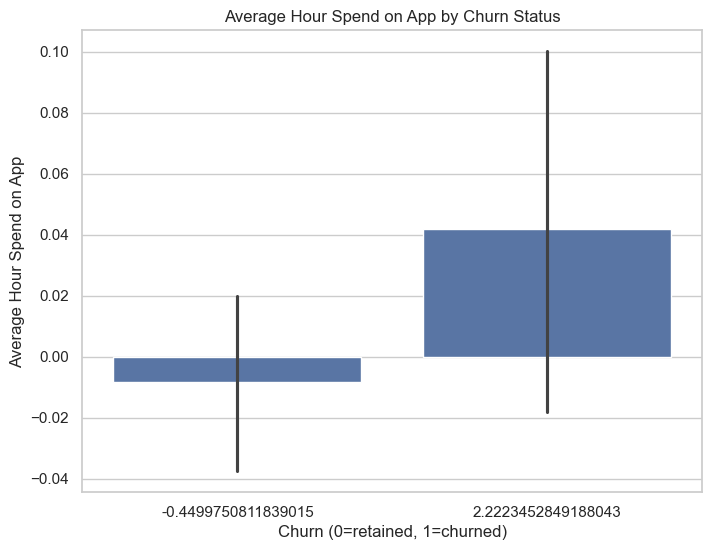

In [26]:
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Churn', y='HourSpendOnApp', estimator='mean')

# Set plot titles and labels
plt.title('Average Hour Spend on App by Churn Status')
plt.xlabel('Churn (0=retained, 1=churned)')
plt.ylabel('Average Hour Spend on App')

# Show the plot
plt.show()

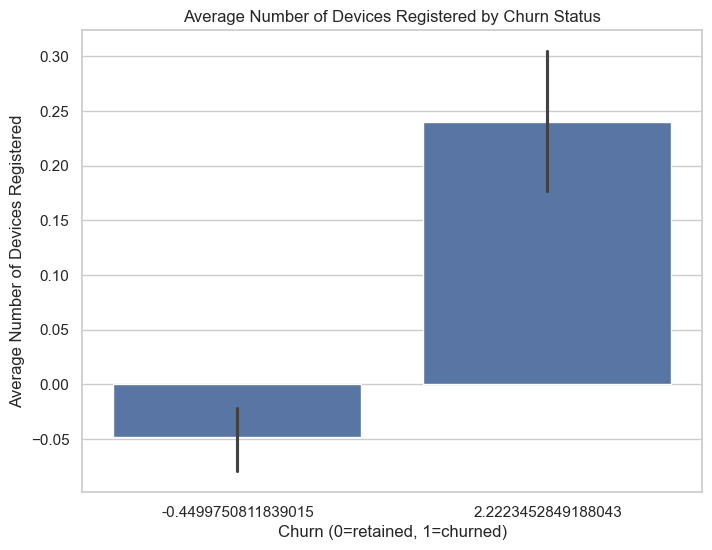

In [27]:
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Churn', y='NumberOfDeviceRegistered', estimator='mean')

# Set plot titles and labels
plt.title('Average Number of Devices Registered by Churn Status')
plt.xlabel('Churn (0=retained, 1=churned)')
plt.ylabel('Average Number of Devices Registered')

# Show the plot
plt.show()

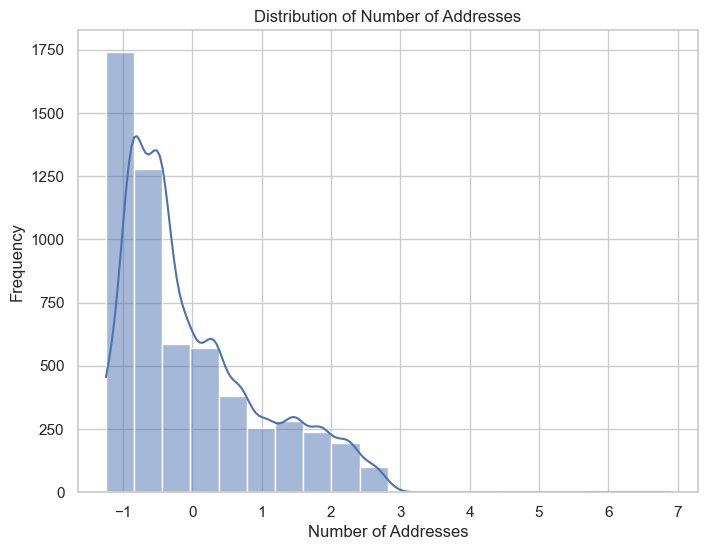

In [28]:
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='NumberOfAddress', bins=20, kde=True)

# Set plot titles and labels
plt.title('Distribution of Number of Addresses')
plt.xlabel('Number of Addresses')
plt.ylabel('Frequency')

# Show the plot
plt.show()

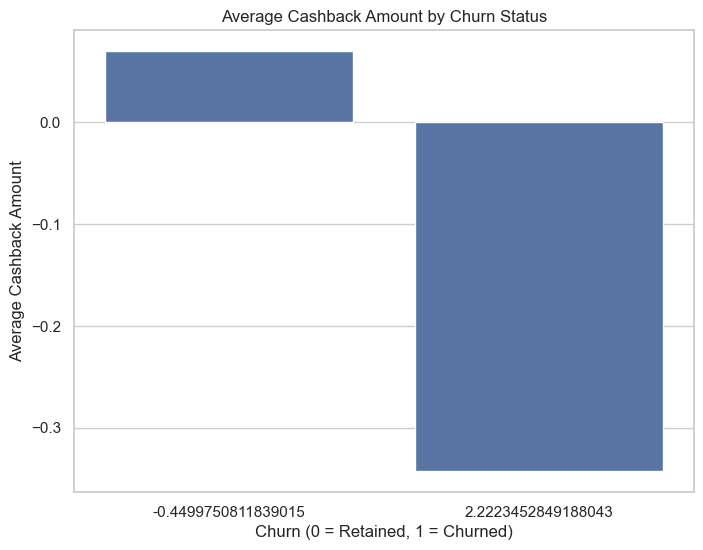

In [29]:
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Churn', y='CashbackAmount', errorbar=None)

# Set plot titles and labels
plt.title('Average Cashback Amount by Churn Status')
plt.xlabel('Churn (0 = Retained, 1 = Churned)')
plt.ylabel('Average Cashback Amount')

# Show the plot
plt.show()

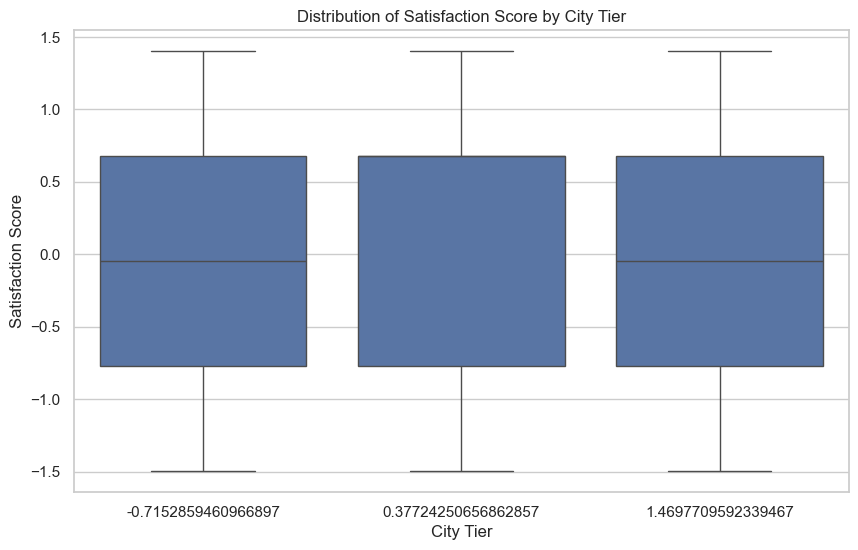

In [30]:
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='CityTier', y='SatisfactionScore')

# Set plot titles and labels
plt.title('Distribution of Satisfaction Score by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Satisfaction Score')

# Show the plot
plt.show()

# Feature engineering

In [31]:


# Sample data
data = pd.DataFrame({
    'Tenure': [1, 7, 13, 25, 37, 50, 68, 72],  # Example data
    'HourSpendOnApp': [1.5, 2.0, 1.2, 2.5, 3.0, 2.0, 1.8, 2.2],  # Example data
    'OrderCount': [5, 8, 3, 6, 7, 4, 9, 5]  # Example data
})

# Define bins and labels
bins = [0, 6, 12, 24, 36, 48, 60, 72]
labels = ['0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years']

# Create tenure category column
data['TenureCategory'] = pd.cut(data['Tenure'], bins=bins, labels=labels, right=False)

# Create interaction term
data['Interaction'] = data['HourSpendOnApp'] * data['OrderCount']

# Create average hours per order column
data['AvgHoursPerOrder'] = data['HourSpendOnApp'] / (data['OrderCount'] + 1)

# Display the dataframe with the new columns
print(data[['Tenure', 'TenureCategory', 'HourSpendOnApp', 'OrderCount', 'Interaction', 'AvgHoursPerOrder']].head())


   Tenure TenureCategory  HourSpendOnApp  OrderCount  Interaction  \
0       1     0-6 months             1.5           5          7.5   
1       7    6-12 months             2.0           8         16.0   
2      13      1-2 years             1.2           3          3.6   
3      25      2-3 years             2.5           6         15.0   
4      37      3-4 years             3.0           7         21.0   

   AvgHoursPerOrder  
0          0.250000  
1          0.222222  
2          0.300000  
3          0.357143  
4          0.375000  


# Feature selection


Column Names and Data Types:
CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object


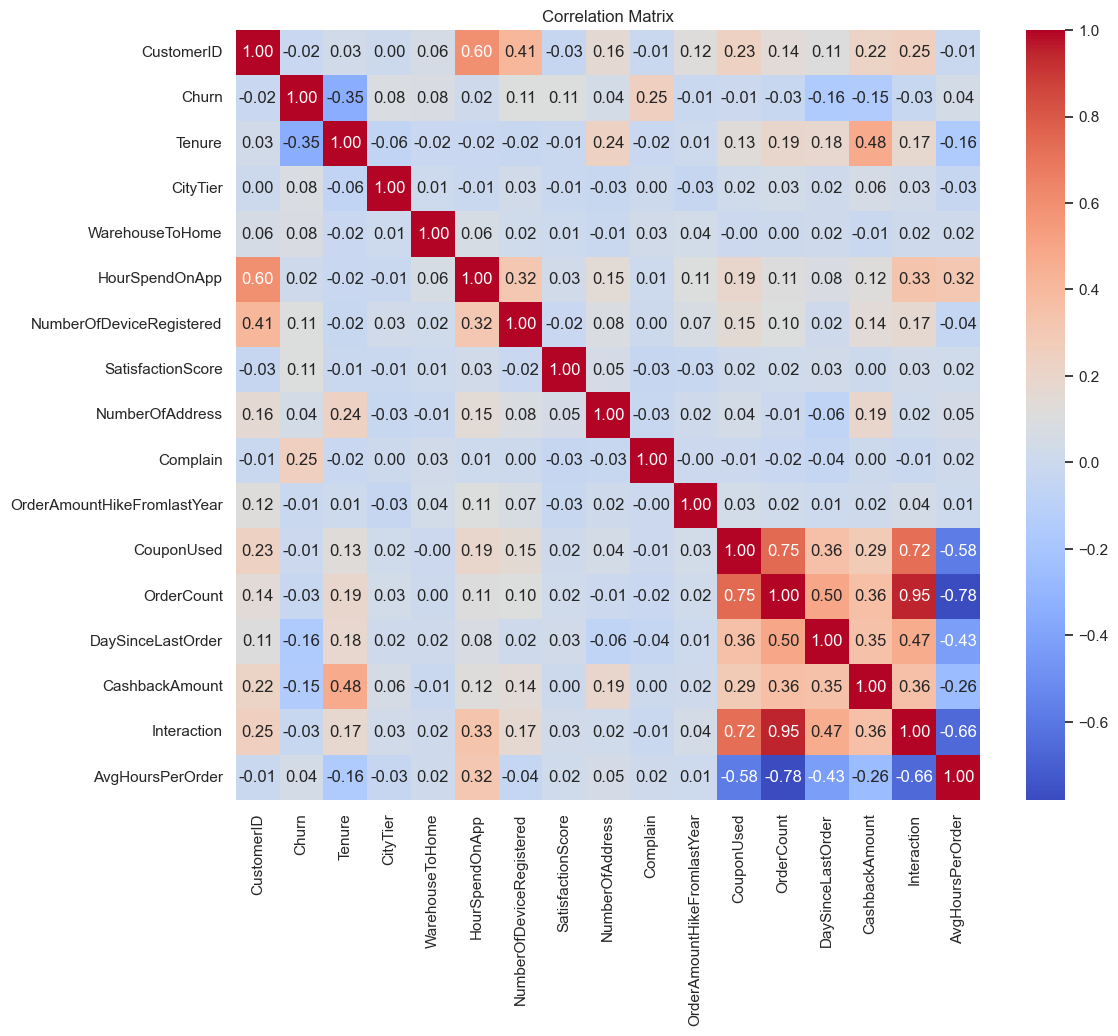

Correlation of features with 'Churn':
Churn                          1.000000
Complain                       0.250188
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
AvgHoursPerOrder               0.040163
HourSpendOnApp                 0.018675
CouponUsed                    -0.008264
OrderAmountHikeFromlastYear   -0.010058
CustomerID                    -0.019083
Interaction                   -0.026421
OrderCount                    -0.028697
CashbackAmount                -0.154161
DaySinceLastOrder             -0.160757
Tenure                        -0.349408
Name: Churn, dtype: float64


In [32]:
# Load the dataset
data = pd.read_csv('ECommerceDataset.csv')

# Check the column names and data types
print("Column Names and Data Types:")
print(data.dtypes)

# Check if 'Churn' exists and convert if needed
if 'Churn' in data.columns:
    if data['Churn'].dtype not in ['float64', 'int64']:
        data['Churn'] = pd.to_numeric(data['Churn'], errors='coerce')
else:
    raise ValueError("Column 'Churn' is missing from the dataframe.")

# Define bins and labels for TenureCategory if needed
bins = [0, 6, 12, 24, 36, 48, 60, 72]
labels = ['0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years']

# Create tenure category column if not already present
if 'TenureCategory' not in data.columns:
    data['TenureCategory'] = pd.cut(data['Tenure'], bins=bins, labels=labels, right=False)

# Create interaction term if not already present
if 'Interaction' not in data.columns:
    data['Interaction'] = data['HourSpendOnApp'] * data['OrderCount']

# Create average hours per order column if not already present
if 'AvgHoursPerOrder' not in data.columns:
    data['AvgHoursPerOrder'] = data['HourSpendOnApp'] / (data['OrderCount'] + 1)

# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Check if 'Churn' is present in the numeric columns
if 'Churn' not in numeric_data.columns:
    print("The 'Churn' column is not present in the numeric columns for correlation.")
else:
    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Generate a heatmap for the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

    # Display correlation of features with the target variable 'Churn'
    print("Correlation of features with 'Churn':")
    print(correlation_matrix['Churn'].sort_values(ascending=False))
    



# Feature Scaling


In [33]:
# List of numeric features to be standardized
numeric_features = ['Tenure', 'HourSpendOnApp', 'OrderCount', 'WarehouseToHome',
                     'SatisfactionScore', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder',
                     'CashbackAmount', 'Interaction', 'AvgHoursPerOrder']

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the numeric features
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Verify the transformation
print(data[numeric_features].head())

     Tenure  HourSpendOnApp  OrderCount  WarehouseToHome  SatisfactionScore  \
0 -0.723420        0.094846   -0.683133        -1.130026          -0.772992   
1       NaN        0.094846   -0.683133        -0.895579          -0.048392   
2       NaN       -1.290467   -0.683133         1.683348          -0.048392   
3 -1.190904       -1.290467   -0.683133        -0.075011           1.400807   
4 -1.190904             NaN   -0.683133        -0.426683           1.400807   

   NumberOfDeviceRegistered  NumberOfAddress  OrderAmountHikeFromlastYear  \
0                  -0.67290         1.852616                    -1.281017   
1                   0.30375         1.078430                    -0.192624   
2                   0.30375         0.691336                    -0.464723   
3                   0.30375         1.465523                     1.984162   
4                  -0.67290        -0.469944                    -1.281017   

   CouponUsed  DaySinceLastOrder  CashbackAmount  Interaction 

In [34]:
print("Missing values in each column:")
print(data[numeric_features].isnull().sum())


Missing values in each column:
Tenure                         264
HourSpendOnApp                 255
OrderCount                     258
WarehouseToHome                251
SatisfactionScore                0
NumberOfDeviceRegistered         0
NumberOfAddress                  0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
DaySinceLastOrder              307
CashbackAmount                   0
Interaction                    513
AvgHoursPerOrder               513
dtype: int64


In [35]:
# Impute missing values with the median
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].median())

# Verify that there are no more missing values
print("Missing values after imputation:")
print(data[numeric_features].isnull().sum())

Missing values after imputation:
Tenure                         0
HourSpendOnApp                 0
OrderCount                     0
WarehouseToHome                0
SatisfactionScore              0
NumberOfDeviceRegistered       0
NumberOfAddress                0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
DaySinceLastOrder              0
CashbackAmount                 0
Interaction                    0
AvgHoursPerOrder               0
dtype: int64


In [36]:
print(data[numeric_features].head())

     Tenure  HourSpendOnApp  OrderCount  WarehouseToHome  SatisfactionScore  \
0 -0.723420        0.094846   -0.683133        -1.130026          -0.772992   
1 -0.139065        0.094846   -0.683133        -0.895579          -0.048392   
2 -0.139065       -1.290467   -0.683133         1.683348          -0.048392   
3 -1.190904       -1.290467   -0.683133        -0.075011           1.400807   
4 -1.190904        0.094846   -0.683133        -0.426683           1.400807   

   NumberOfDeviceRegistered  NumberOfAddress  OrderAmountHikeFromlastYear  \
0                  -0.67290         1.852616                    -1.281017   
1                   0.30375         1.078430                    -0.192624   
2                   0.30375         0.691336                    -0.464723   
3                   0.30375         1.465523                     1.984162   
4                  -0.67290        -0.469944                    -1.281017   

   CouponUsed  DaySinceLastOrder  CashbackAmount  Interaction 

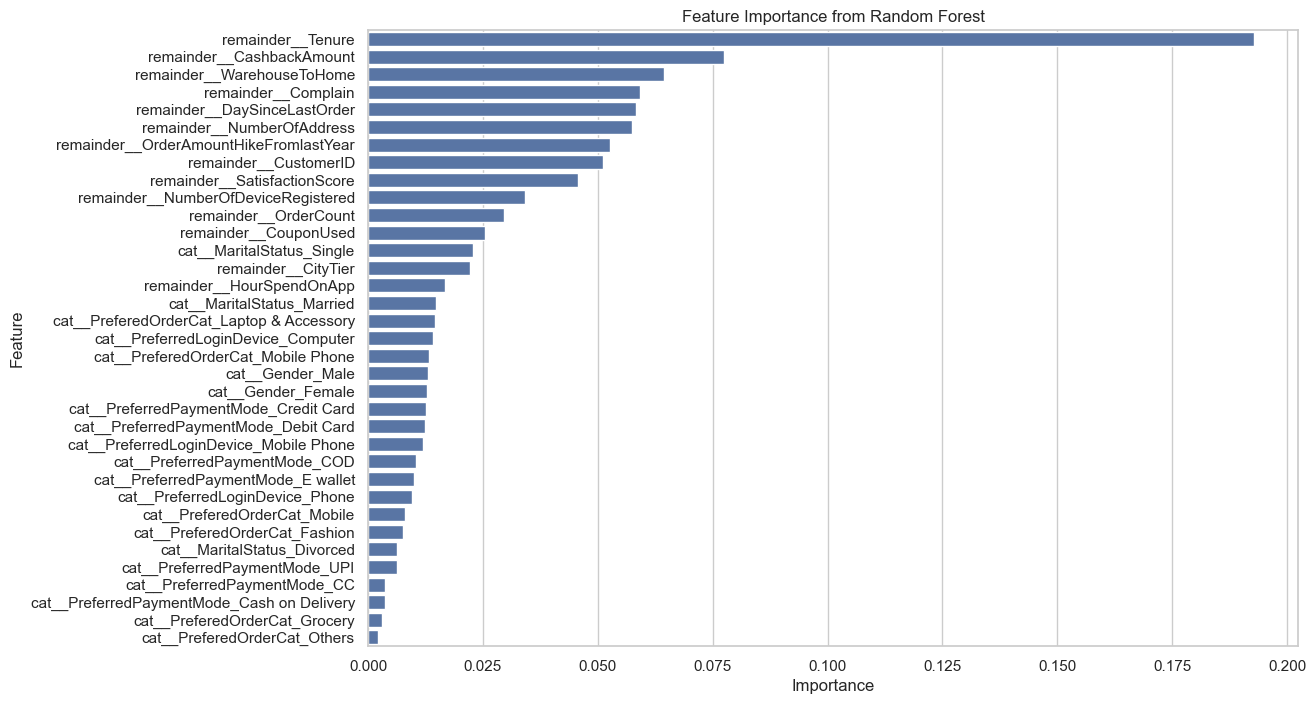

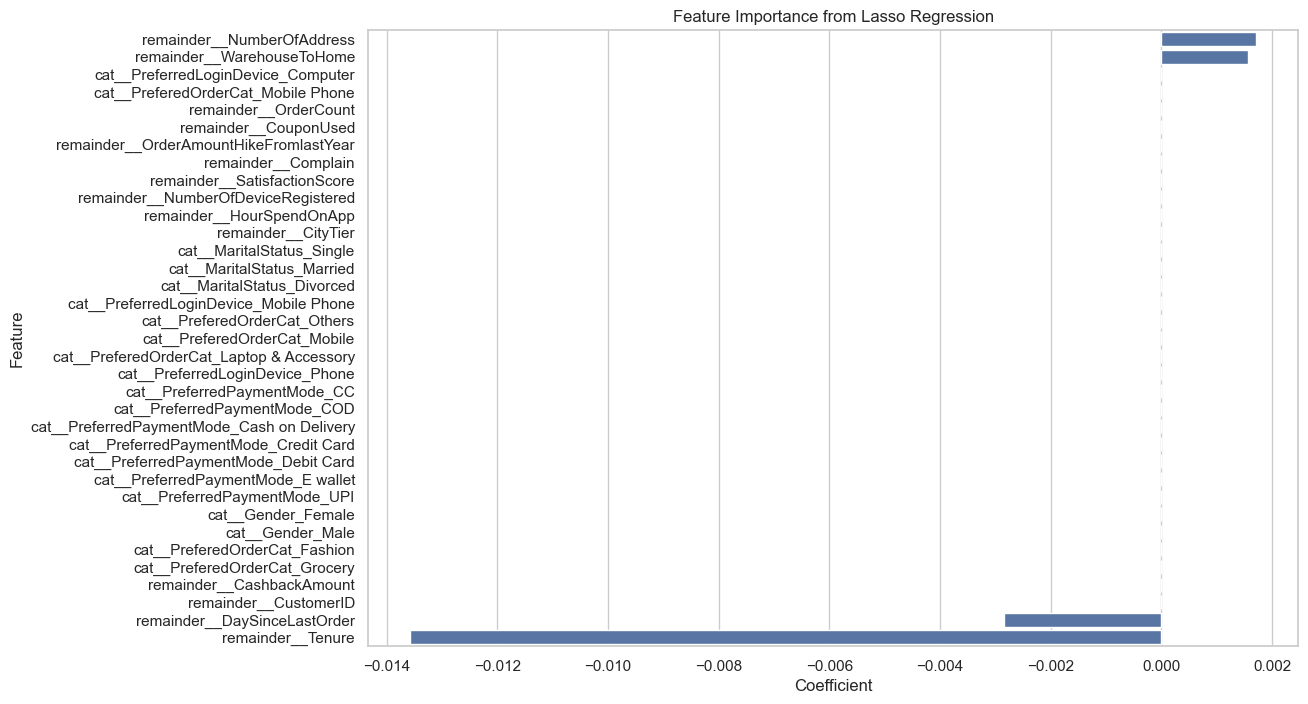

In [37]:
data = pd.read_csv('ECommerceDataset.csv')

# Define features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

# Identify categorical features
categorical_features = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

# Create a column transformer for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep the numeric features unchanged
)

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_transformed)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_imputed, y)
rf_importances = rf_model.feature_importances_

# Create a DataFrame for Random Forest feature importances
rf_importance_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot Random Forest Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

# Train Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_imputed, y)
lasso_coefficients = lasso.coef_

# Create a DataFrame for Lasso coefficients
lasso_importance_df = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Coefficient': lasso_coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot Lasso Feature Coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=lasso_importance_df)
plt.title('Feature Importance from Lasso Regression')
plt.show()


In [38]:
# Load the dataset
data = pd.read_csv('ECommerceDataset.csv')

# Check the column names and data types
print("Column Names and Data Types:")
print(data.dtypes)

# Check if 'Churn' exists and convert if needed
if 'Churn' in data.columns:
    if data['Churn'].dtype not in ['float64', 'int64']:
        data['Churn'] = pd.to_numeric(data['Churn'], errors='coerce')
else:
    raise ValueError("Column 'Churn' is missing from the dataframe.")

# Define bins and labels for TenureCategory if needed
bins = [0, 6, 12, 24, 36, 48, 60, 72]
labels = ['0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years']

# Create tenure category column if not already present
if 'TenureCategory' not in data.columns:
    data['TenureCategory'] = pd.cut(data['Tenure'], bins=bins, labels=labels, right=False)

# Create interaction term if not already present
if 'Interaction' not in data.columns:
    data['Interaction'] = data['HourSpendOnApp'] * data['OrderCount']

# Create average hours per order column if not already present
if 'AvgHoursPerOrder' not in data.columns:
    data['AvgHoursPerOrder'] = data['HourSpendOnApp'] / (data['OrderCount'] + 1)

# Verify column names
print("Available columns in data:")
print(data.columns)

# Verify creation of necessary columns
missing_features = []
if 'Interaction' not in data.columns:
    missing_features.append("Interaction")
if 'AvgHoursPerOrder' not in data.columns:
    missing_features.append("AvgHoursPerOrder")

if missing_features:
    print(f"Missing columns: {', '.join(missing_features)}")

# Define selected features
selected_features = [
    'Tenure', 'HourSpendOnApp', 'OrderCount',
    'WarehouseToHome', 'SatisfactionScore', 'NumberOfDeviceRegistered',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
    'DaySinceLastOrder', 'Interaction', 'AvgHoursPerOrder'
]

# Check if all selected features exist
available_features = [feature for feature in selected_features if feature in data.columns]
print("Features available for final DataFrame:")
print(available_features)

# Prepare the final DataFrame
final_data = data[available_features + ['Churn']]

# Check for missing values and handle them
print("Missing values in final data:")
print(final_data.isnull().sum())

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
final_data_imputed = pd.DataFrame(imputer.fit_transform(final_data), columns=final_data.columns)

# Verify data after imputation
print("Missing values after imputation:")
print(final_data_imputed.isnull().sum())

# Split the data into features and target
X = final_data_imputed.drop('Churn', axis=1)
y = final_data_imputed['Churn']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Print feature importances
importances = clf.feature_importances_
feature_importance = pd.DataFrame({'Feature': available_features, 'Importance': importances})
print("Feature Importances:")
print(feature_importance.sort_values(by='Importance', ascending=False))

Column Names and Data Types:
CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object
Available columns in data:
Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnAp

In [39]:
print("Shape of X_test:", X_test.shape)


Shape of X_test: (1689, 12)


In [40]:
feature_names = X.columns  # This should be correct if X was created from final_data_imputed
print("Feature names:", feature_names)
print("Number of feature names:", len(feature_names))


Feature names: Index(['Tenure', 'HourSpendOnApp', 'OrderCount', 'WarehouseToHome',
       'SatisfactionScore', 'NumberOfDeviceRegistered', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder',
       'Interaction', 'AvgHoursPerOrder'],
      dtype='object')
Number of feature names: 12


In [41]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(clf)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)


In [42]:
print("Number of classes detected in SHAP values:", len(shap_values))
for i, values in enumerate(shap_values):
    print(f"SHAP values shape for class {i}: {values.shape}")


Number of classes detected in SHAP values: 1689
SHAP values shape for class 0: (12, 2)
SHAP values shape for class 1: (12, 2)
SHAP values shape for class 2: (12, 2)
SHAP values shape for class 3: (12, 2)
SHAP values shape for class 4: (12, 2)
SHAP values shape for class 5: (12, 2)
SHAP values shape for class 6: (12, 2)
SHAP values shape for class 7: (12, 2)
SHAP values shape for class 8: (12, 2)
SHAP values shape for class 9: (12, 2)
SHAP values shape for class 10: (12, 2)
SHAP values shape for class 11: (12, 2)
SHAP values shape for class 12: (12, 2)
SHAP values shape for class 13: (12, 2)
SHAP values shape for class 14: (12, 2)
SHAP values shape for class 15: (12, 2)
SHAP values shape for class 16: (12, 2)
SHAP values shape for class 17: (12, 2)
SHAP values shape for class 18: (12, 2)
SHAP values shape for class 19: (12, 2)
SHAP values shape for class 20: (12, 2)
SHAP values shape for class 21: (12, 2)
SHAP values shape for class 22: (12, 2)
SHAP values shape for class 23: (12, 2)
SH

In [43]:
# Check if the shapes align
is_multiclass = len(shap_values) > 2

if is_multiclass:
    for i in range(len(shap_values)):
        print(f"Class {i} SHAP values shape: {shap_values[i].shape}")
        if shap_values[i].shape[0] != X_test.shape[0]:
            print(f"Shape mismatch detected for class {i}:")
            print(f"SHAP values shape: {shap_values[i].shape}")
            print(f"Test data shape: {X_test.shape}")
        else:
            print(f"Class {i} SHAP values shape matches the test data.")
else:
    if shap_values[1].shape[0] != X_test.shape[0]:
        print(f"Shape mismatch detected for class 1:")
        print(f"SHAP values shape: {shap_values[1].shape}")
        print(f"Test data shape: {X_test.shape}")
    else:
        print("SHAP values shape matches for class 1.")


Class 0 SHAP values shape: (12, 2)
Shape mismatch detected for class 0:
SHAP values shape: (12, 2)
Test data shape: (1689, 12)
Class 1 SHAP values shape: (12, 2)
Shape mismatch detected for class 1:
SHAP values shape: (12, 2)
Test data shape: (1689, 12)
Class 2 SHAP values shape: (12, 2)
Shape mismatch detected for class 2:
SHAP values shape: (12, 2)
Test data shape: (1689, 12)
Class 3 SHAP values shape: (12, 2)
Shape mismatch detected for class 3:
SHAP values shape: (12, 2)
Test data shape: (1689, 12)
Class 4 SHAP values shape: (12, 2)
Shape mismatch detected for class 4:
SHAP values shape: (12, 2)
Test data shape: (1689, 12)
Class 5 SHAP values shape: (12, 2)
Shape mismatch detected for class 5:
SHAP values shape: (12, 2)
Test data shape: (1689, 12)
Class 6 SHAP values shape: (12, 2)
Shape mismatch detected for class 6:
SHAP values shape: (12, 2)
Test data shape: (1689, 12)
Class 7 SHAP values shape: (12, 2)
Shape mismatch detected for class 7:
SHAP values shape: (12, 2)
Test data sh

Number of classes detected in SHAP values: 1689
SHAP values shape for class 0: (12, 2)
SHAP values shape for class 1: (12, 2)
SHAP values shape for class 2: (12, 2)
SHAP values shape for class 3: (12, 2)
SHAP values shape for class 4: (12, 2)
SHAP values shape for class 5: (12, 2)
SHAP values shape for class 6: (12, 2)
SHAP values shape for class 7: (12, 2)
SHAP values shape for class 8: (12, 2)
SHAP values shape for class 9: (12, 2)
SHAP values shape for class 10: (12, 2)
SHAP values shape for class 11: (12, 2)
SHAP values shape for class 12: (12, 2)
SHAP values shape for class 13: (12, 2)
SHAP values shape for class 14: (12, 2)
SHAP values shape for class 15: (12, 2)
SHAP values shape for class 16: (12, 2)
SHAP values shape for class 17: (12, 2)
SHAP values shape for class 18: (12, 2)
SHAP values shape for class 19: (12, 2)
SHAP values shape for class 20: (12, 2)
SHAP values shape for class 21: (12, 2)
SHAP values shape for class 22: (12, 2)
SHAP values shape for class 23: (12, 2)
SH

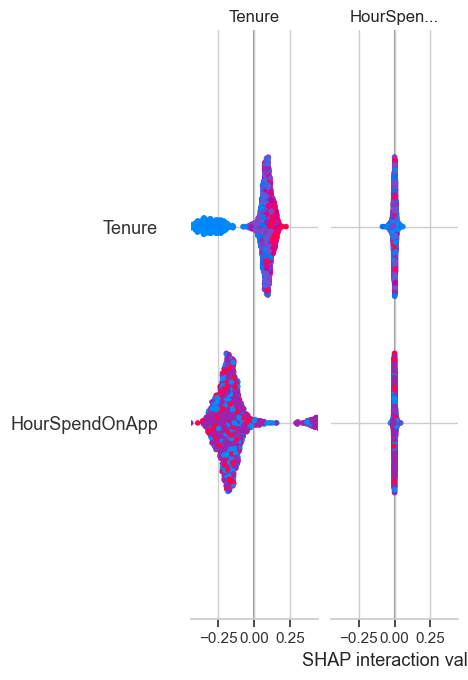

In [44]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming clf is your trained RandomForestClassifier and X_test is prepared.

# Define feature names
feature_names = [
    'Tenure', 'HourSpendOnApp', 'OrderCount', 'WarehouseToHome',
    'SatisfactionScore', 'NumberOfDeviceRegistered', 'NumberOfAddress',
    'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder',
    'Interaction', 'AvgHoursPerOrder'
]

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(clf)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Debugging shapes
print("Number of classes detected in SHAP values:", len(shap_values))
for i, values in enumerate(shap_values):
    print(f"SHAP values shape for class {i}: {values.shape}")

print("Shape of X_test:", X_test.shape)

# Convert X_test to DataFrame with correct feature names
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Print sample rows of X_test_df
print("Sample rows of X_test_df:")
print(X_test_df.head())

# Plot SHAP values
is_multiclass = isinstance(shap_values, list)

if is_multiclass:
    for i in range(len(shap_values)):
        print(f"Plotting SHAP values for class {i}")
        try:
            shap.summary_plot(shap_values[i], X_test_df)
        except Exception as e:
            print(f"Error plotting SHAP values for class {i}: {e}")
else:
    print("Plotting SHAP values for the single class")
    try:
        shap.summary_plot(shap_values, X_test_df)
    except Exception as e:
        print(f"Error plotting SHAP values for the single class: {e}")


In [45]:
# Initialize your model
clf = RandomForestClassifier(random_state=42)

# Define the number of folds for cross-validation
num_folds = 10

# Initialize K-Fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_scaled, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation: {np.std(cv_scores)}")

Cross-Validation Scores: [0.96447602 0.97158082 0.95381883 0.96447602 0.98046181 0.94849023
 0.94849023 0.95026643 0.95381883 0.94316163]
Mean Accuracy: 0.9579040852575489
Standard Deviation: 0.01126311819714932


Confusion Matrix:
[[1385   29]
 [  80  195]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      1414
         1.0       0.87      0.71      0.78       275

    accuracy                           0.94      1689
   macro avg       0.91      0.84      0.87      1689
weighted avg       0.93      0.94      0.93      1689



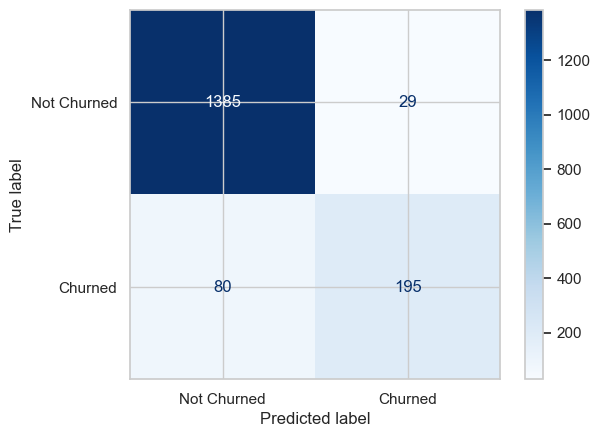

In [50]:
# Assuming `data` is your DataFrame

# Create missing features if not present
if 'Interaction' not in data.columns:
    data['Interaction'] = data['HourSpendOnApp'] * data['OrderCount']

if 'AvgHoursPerOrder' not in data.columns:
    data['AvgHoursPerOrder'] = data['HourSpendOnApp'] / (data['OrderCount'] + 1)

# Define selected features and target
selected_features = [
    'Tenure', 'HourSpendOnApp', 'OrderCount', 'WarehouseToHome',
    'SatisfactionScore', 'NumberOfDeviceRegistered', 'NumberOfAddress',
    'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder',
    'Interaction', 'AvgHoursPerOrder'
]

# Check if all selected features are in the DataFrame
missing_features = [feature for feature in selected_features if feature not in data.columns]
if missing_features:
    raise KeyError(f"Missing features: {missing_features}")

# Prepare the final DataFrame
final_data = data[selected_features + ['Churn']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
final_data_imputed = pd.DataFrame(imputer.fit_transform(final_data), columns=final_data.columns)

# Split the data into features and target
X = final_data_imputed.drop('Churn', axis=1)
y = final_data_imputed['Churn']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Generate Predictions
y_pred = clf.predict(X_test)

# Compute the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')

# Calculate Performance Metrics
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

In [51]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:")
print(best_params)

# Use the best model to predict
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [52]:
# Initialize the RandomForestClassifier with the best parameters
best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the final model
best_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

Confusion Matrix:
[[1387   27]
 [  80  195]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      1414
         1.0       0.88      0.71      0.78       275

    accuracy                           0.94      1689
   macro avg       0.91      0.84      0.87      1689
weighted avg       0.93      0.94      0.93      1689



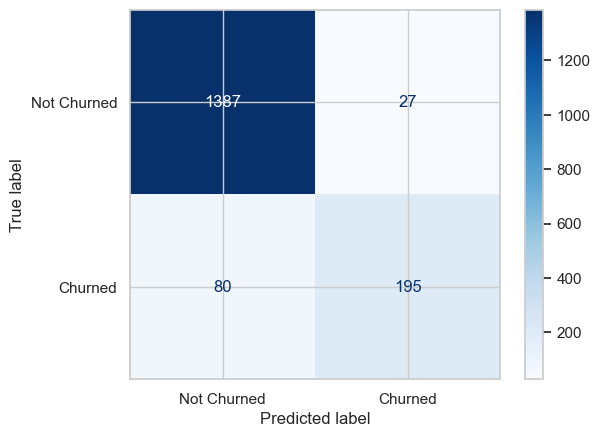

In [54]:

# Generate predictions
y_pred_final = best_rf.predict(X_test)

# Compute the Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:")
print(cm_final)

# Plot the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')

# Print Classification Report
report_final = classification_report(y_test, y_pred_final)
print("\nClassification Report:")
print(report_final)


In [55]:
import joblib

# Save the model
joblib.dump(clf, 'random_forest_churn_model.pkl')


['random_forest_churn_model.pkl']

In [56]:
import joblib

# Load the model
loaded_model = joblib.load('random_forest_churn_model.pkl')

# Verify by making a prediction
sample_prediction = loaded_model.predict(X_test[:1])  # Predict on a sample
print("Sample Prediction:", sample_prediction)


Sample Prediction: [1.]
